In [32]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('Fake_news_content_detection.csv')

In [34]:
df['label'] = (df['True'] | df['Mostly-True']).astype(int)
df = df[['Text', 'label']]

In [35]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)        
    text = re.sub(r'[^a-zA-Z\s]', '', text)    
    text = re.sub(r'\s+', ' ', text).strip()   
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

In [37]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [38]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [39]:
lr=LogisticRegression(max_iter=1000)
svc=SVC(probability=True)
rf=RandomForestClassifier()
xg=XGBClassifier(use_label_encoder=False, eval_metric='logloss')

Logistic Regression
Accuracy: 0.6626
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.91      0.78      1326
           1       0.56      0.21      0.31       722

    accuracy                           0.66      2048
   macro avg       0.62      0.56      0.54      2048
weighted avg       0.64      0.66      0.61      2048



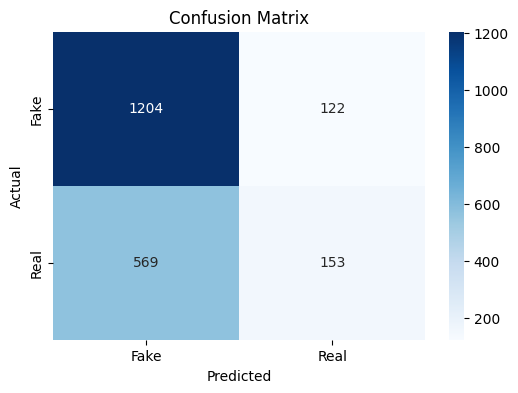

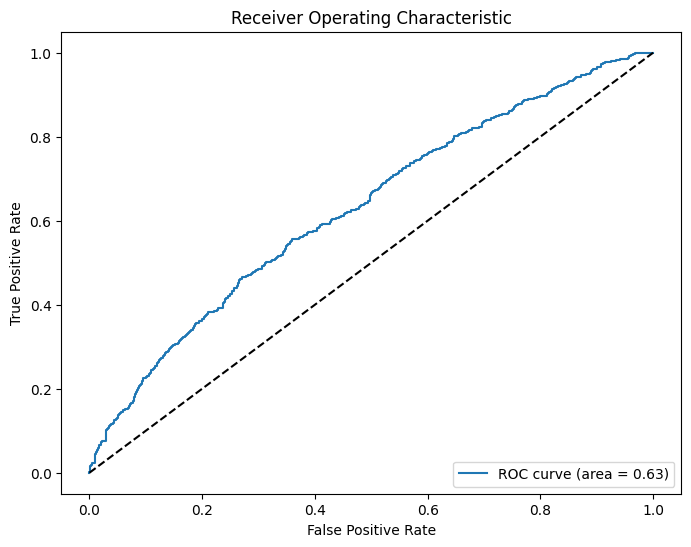

In [40]:
print('Logistic Regression')
lr.fit(X_train_tfidf, y_train)
evaluate_model(lr, X_test_tfidf, y_test)

SVC
Accuracy: 0.6606
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.95      0.78      1326
           1       0.59      0.13      0.21       722

    accuracy                           0.66      2048
   macro avg       0.63      0.54      0.50      2048
weighted avg       0.64      0.66      0.58      2048



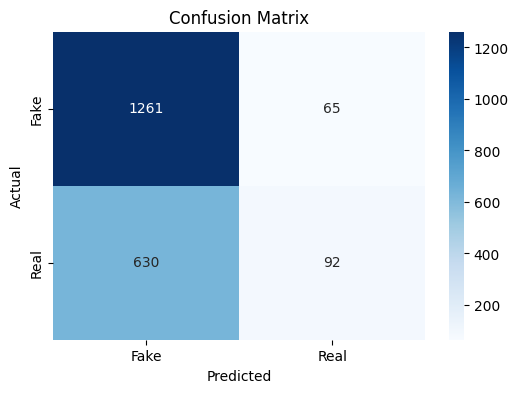

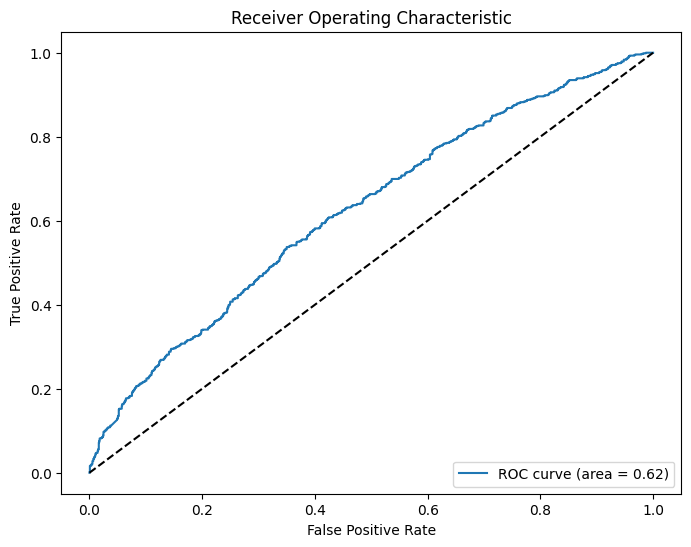

In [41]:
print('SVC')
svc.fit(X_train_tfidf, y_train)
evaluate_model(svc, X_test_tfidf, y_test)

RandomForest Classifier
Accuracy: 0.6436
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76      1326
           1       0.49      0.19      0.27       722

    accuracy                           0.64      2048
   macro avg       0.58      0.54      0.52      2048
weighted avg       0.60      0.64      0.59      2048



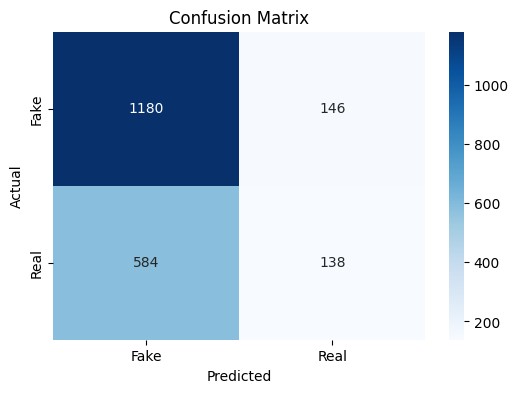

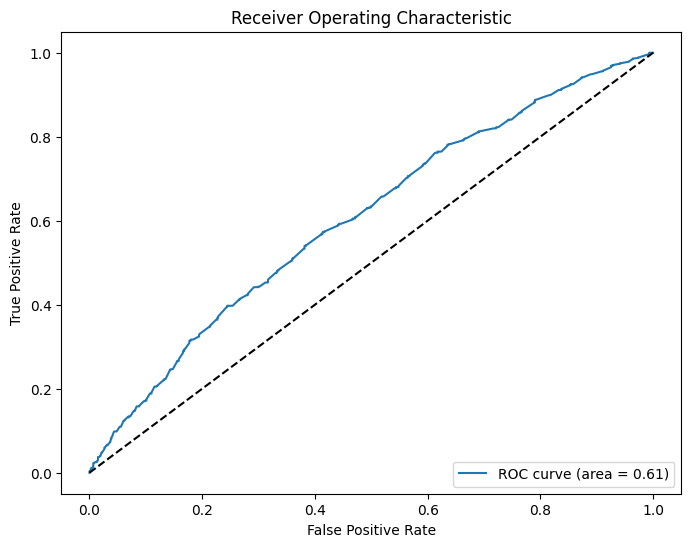

In [42]:
print('RandomForest Classifier')
rf.fit(X_train_tfidf, y_train)
evaluate_model(rf, X_test_tfidf, y_test)

XGB Classifier


C:\Users\vimal\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:03:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6445
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77      1326
           1       0.49      0.18      0.26       722

    accuracy                           0.64      2048
   macro avg       0.58      0.54      0.52      2048
weighted avg       0.60      0.64      0.59      2048



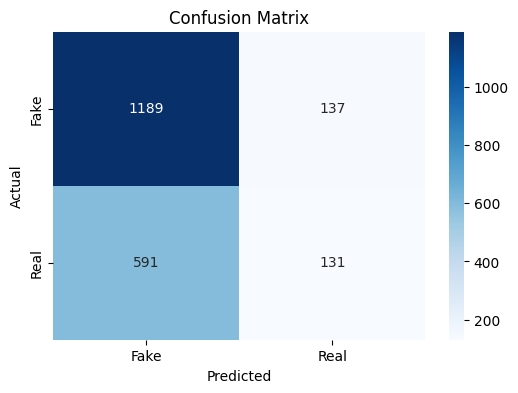

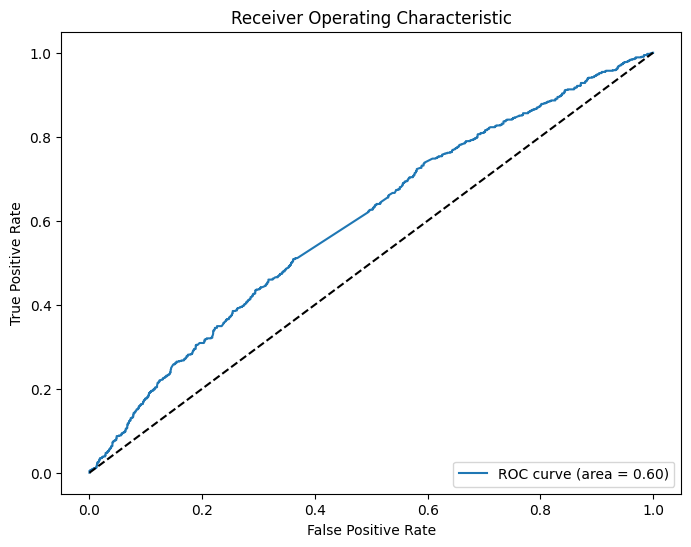

In [43]:
print('XGB Classifier')
xg.fit(X_train_tfidf, y_train)
evaluate_model(xg, X_test_tfidf, y_test)

In [47]:
def predict_news(text, model, vectorizer):
    cleaned_text = clean_text(text)
    text_tfidf = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_tfidf)
    return 'Real News' if prediction[0] == 1 else 'Fake News'

In [48]:
example_text = "Breaking news: The economy is showing signs of recovery after recent policies."
print("\nReal-Time Prediction:")
print(predict_news(example_text,lr, vectorizer))


Real-Time Prediction:
Fake News
